In [1]:
#Graphs Of Rate Changes For Various Algorithms And Differeing Parameters In Read Until Simulator
#modules to make graphs
library("ggplot2")
library("gridExtra")
library("plyr")
library("rgl")
#Algorithm key Simulator runs
#1b/Mp == ran with Min_Proportion Algor
#P == ran with Probability Model
#T == ran with threshold Model
#NR == ran with no read until
#std_res == ran with standard_restrict

#needed for x axis
number_ticks <- function(n) {function(limits) pretty(limits, n)}

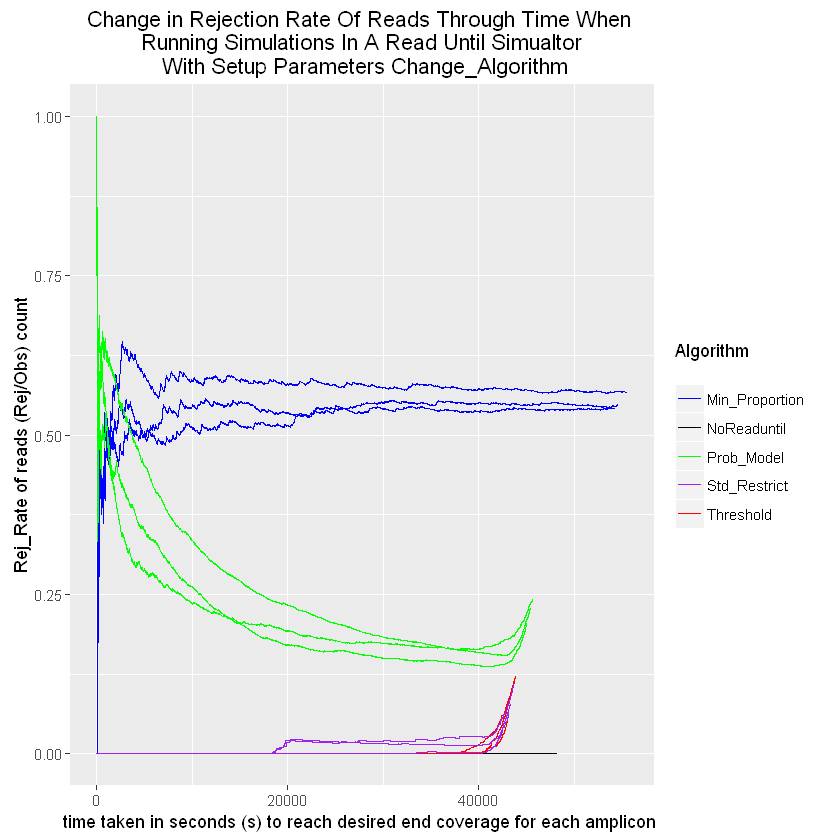

In [19]:
#Change Algorithm 
name = "Change_Algorithm"
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s
#Change_Algorithm_std generate a line plot showing rejection rate reads through time of the simulation run
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig1 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters Change_Algorithm"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig1

#calualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Change_Algorithm = data.frame(number,names, Averages)

#add label for overall graph
Average_Change_Algorithm["Test"] = "Change_Algorithm"

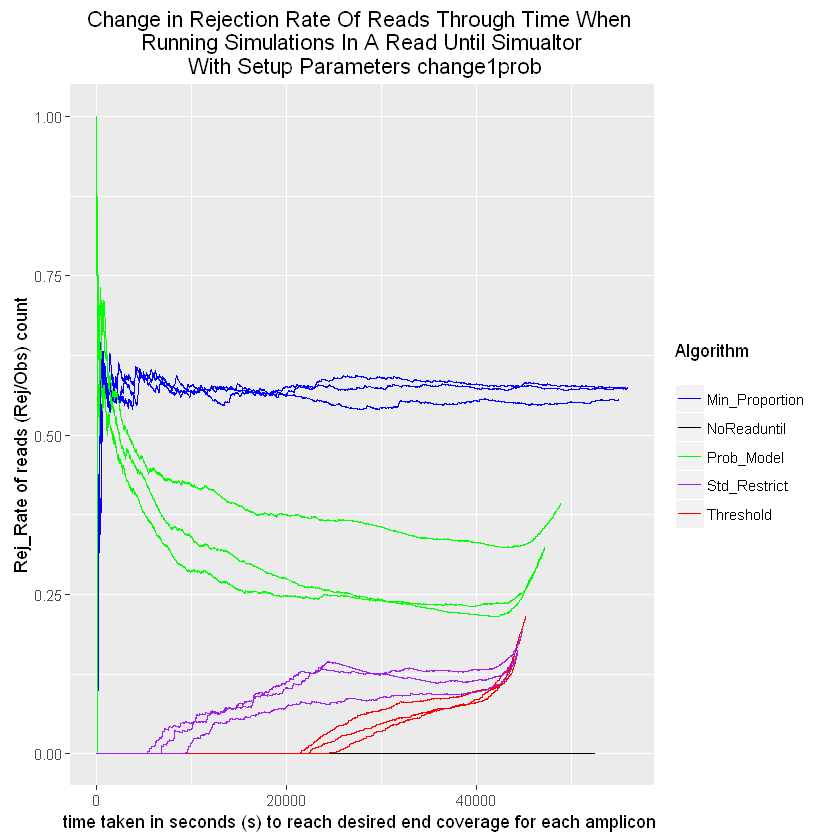

In [20]:
#Change 1 prob
name = "change1prob"
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s
#change1prob generate a line plot showing rejection rate reads through time of the simulation run
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig2 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters change1prob"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig2

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_change1prob= data.frame(number,names, Averages)

#add label for overall graph
Average_change1prob["Test"] = "change1prob"

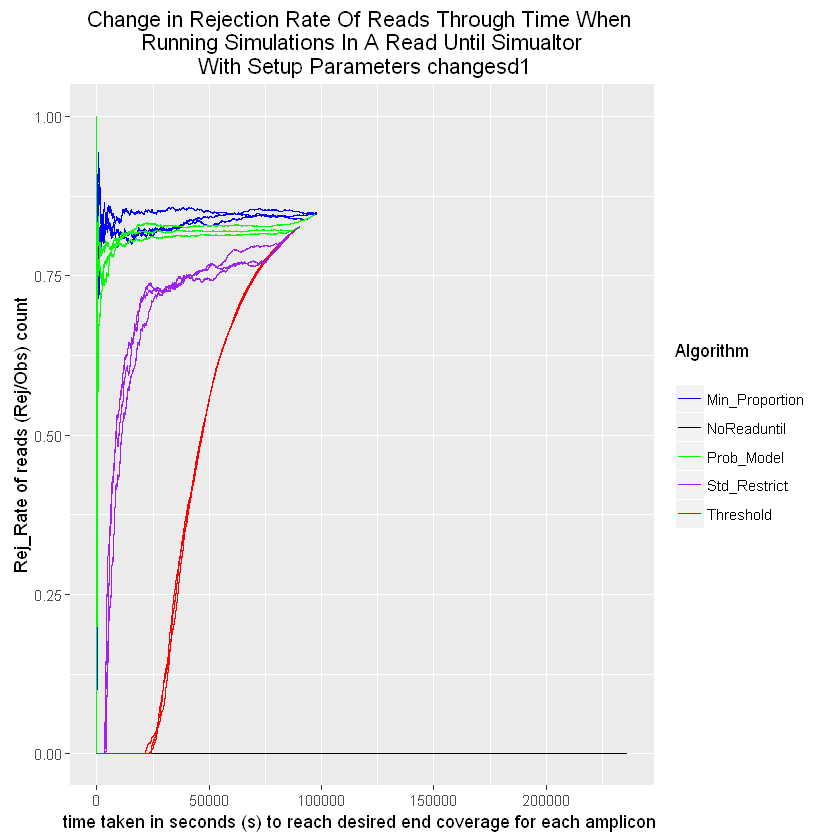

In [23]:
#Change std1
name = "changesd1"
#Changesd1 (change abundance ratio)
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 1,2,3,4,5,6,7,8,9,10
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s

#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig3 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters changesd1"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig3

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_changesd1 = data.frame(number,names, Averages)

#add label for overall graph
Average_changesd1["Test"] = "changesd1"

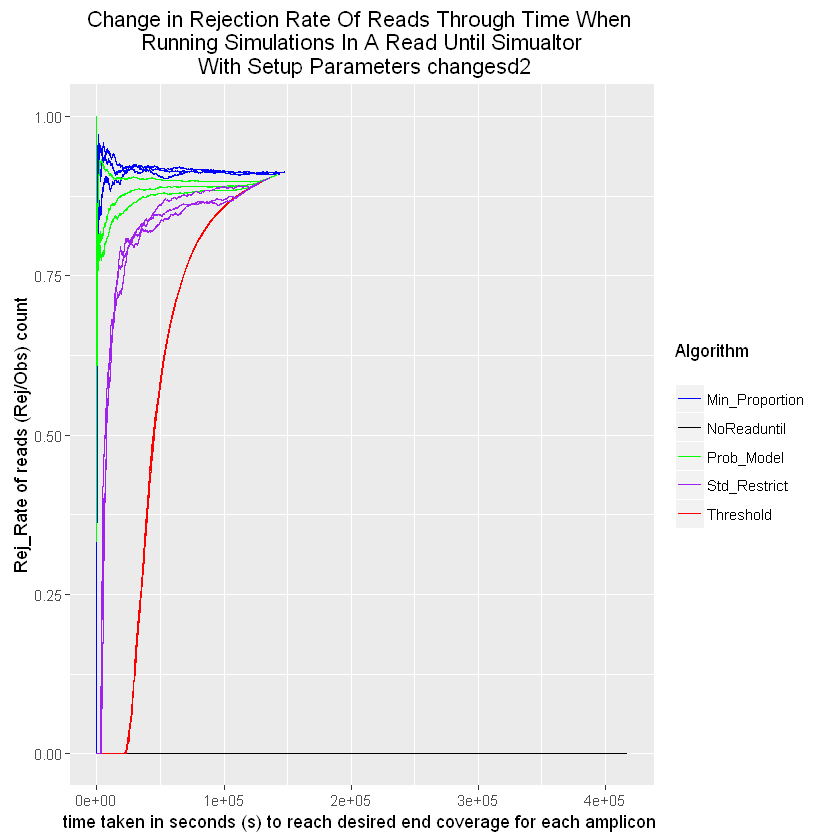

In [22]:
#Changesd2 (change ratio so all amplicons have different abundance)
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 1,3,5,7,9,11,13,15,17,19
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s
name = "changesd2"


#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig4 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters changesd2"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig4

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_changesd2 = data.frame(number,names, Averages)

#add label for overall graph
Average_changesd2["Test"] = "changesd2"

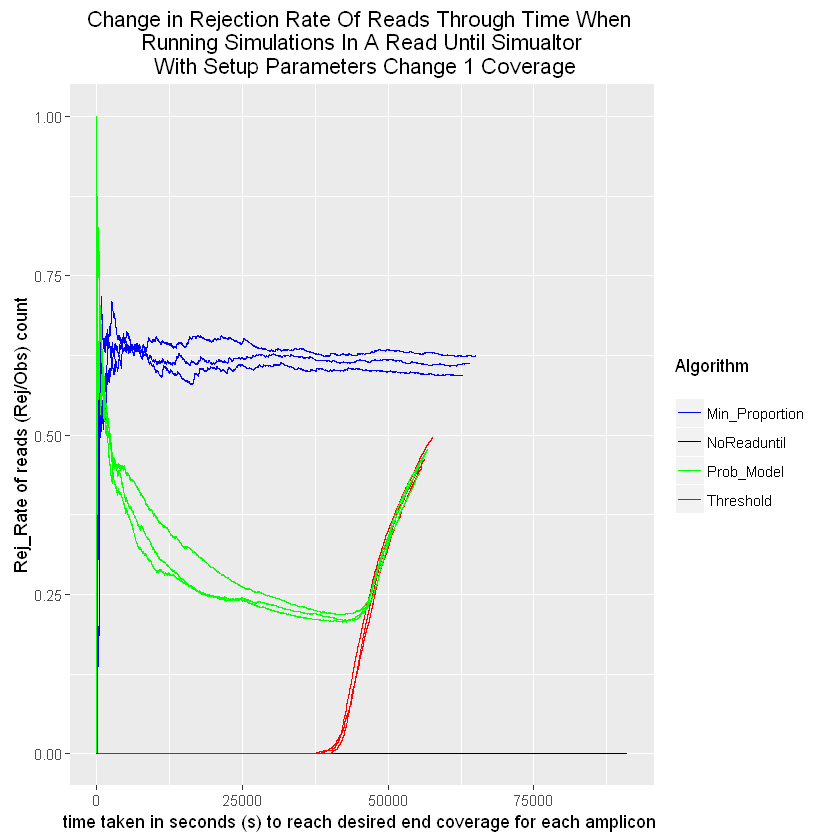

In [24]:
#Change 1 coverage one amplicons coverage was changed to be differnt to other amplicons
#paras in simulator 
#-cov 500,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s

name = "change1coverage"
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])


#lineplot
Fig5 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters Change 1 Coverage"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig5

#calcualte averages used later on for compareing between tests
number = c(1:12)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3)
Average_change1coverage = data.frame(number,names, Averages)

#add label for overall graph
Average_change1coverage["Test"] = "change1coverage"

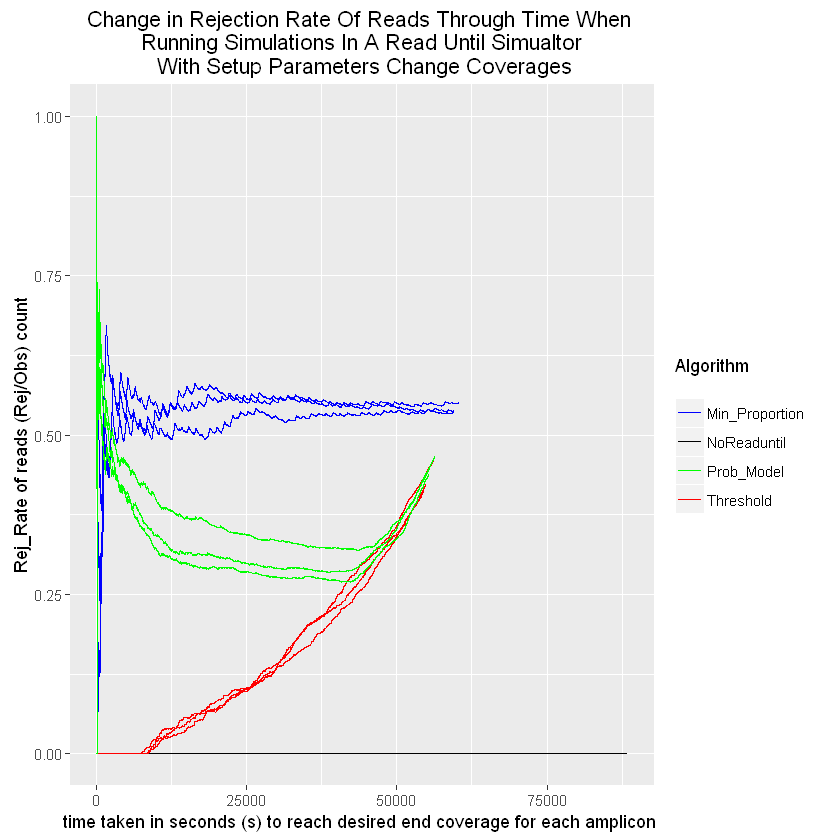

In [25]:
#Change all coverage changed amplicons coverage was changed to be differnt to other amplicons
#paras in simulator 
#-cov 50,100,150,200,250,300,350,400,450,500
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000
#-match/reload/rej time 1s
#-seq speed 250bs/s

name = "Change_Coverage"
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])


#lineplot
Fig6 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters Change Coverages"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig6

#calcualte averages used later on for compareing between tests
number = c(1:12)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3)
Average_Change_Coverage = data.frame(number,names, Averages)

#add label for overall graph
Average_Change_Coverage["Test"] = "Change_Coverage"

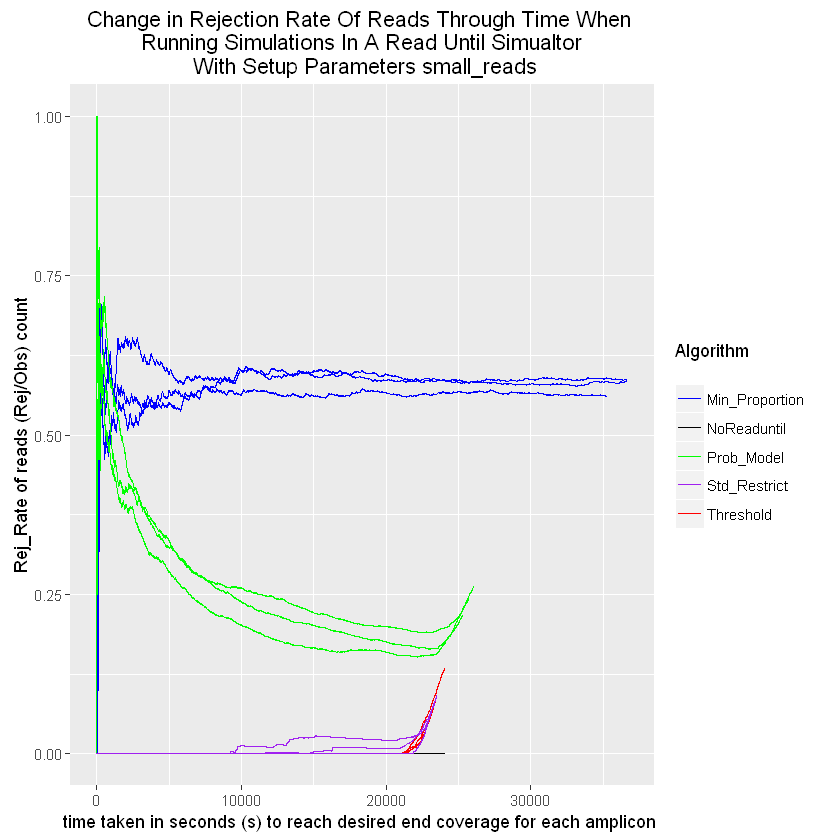

In [26]:
#small reads all read half the size 
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 1000
#-match/reload/rej time 1s
#-seq speed 250bs/s
name = "small_reads"


#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig7 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters small_reads"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig7

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_small_reads = data.frame(number,names, Averages)

#add label for overall graph
Average_small_reads["Test"] = "small_reads"

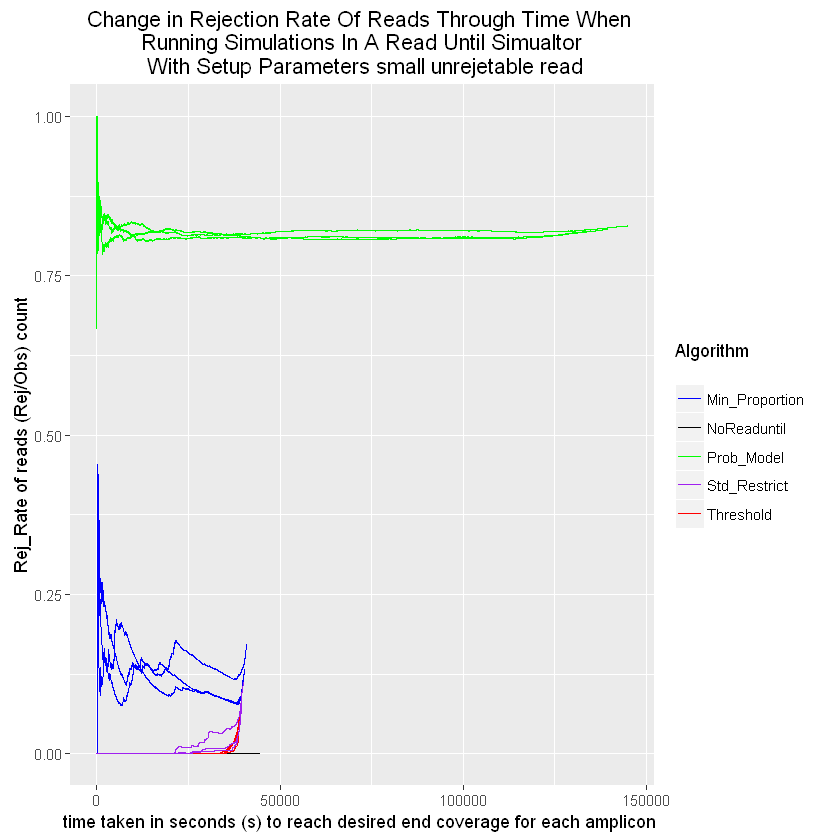

In [27]:
#small unrejetable reads 1 read to small for read until
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000 one read amp1 readlength == 100
#-match/reload/rej time 1s
#-seq speed 250bs/s
name = "Small_read_unrejectable"

#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig8 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Of Reads Through Time When \n Running Simulations In A Read Until Simualtor \n With Setup Parameters small unrejetable read"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig8

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Small_read_unrejectable = data.frame(number,names, Averages)

#add label for overall graph
Average_Small_read_unrejectable["Test"] = "Small_read_unrejectable"

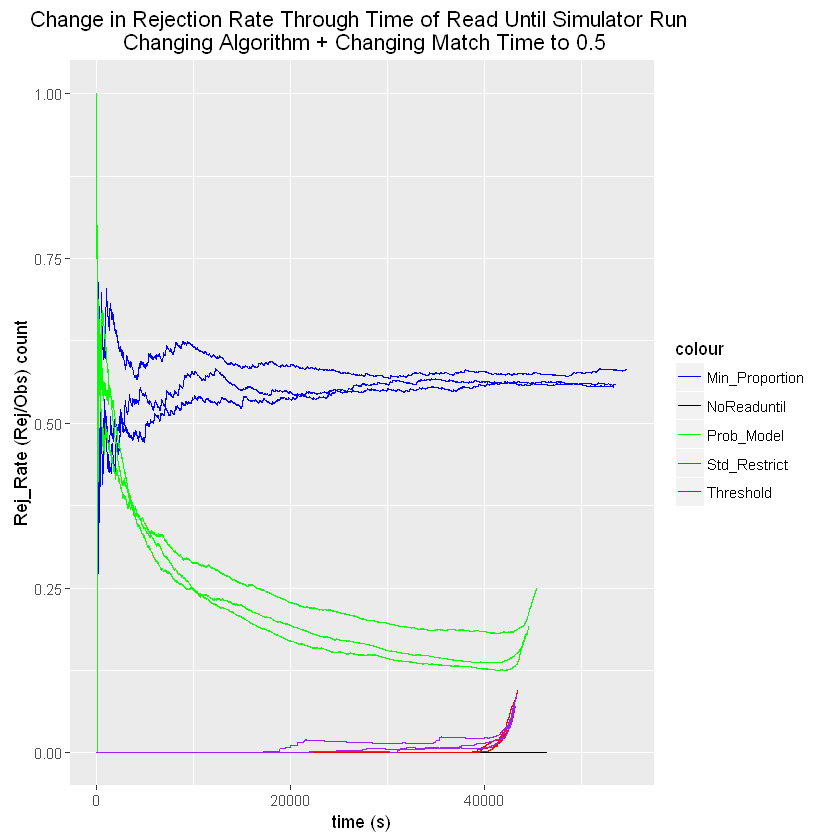

In [16]:
#match time
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000 
#-reload/rej time 1s
#-match time 0.5
#-seq speed 250bs/s
name = "Match_time"

#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig10 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Through Time of Read Until Simulator Run \n Changing Algorithm + Changing Match Time to 0.5")+
ylab("Rej_Rate (Rej/Obs) count")+xlab("time (s)")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig10

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Match_time = data.frame(number,names, Averages)

#add label for overall graph
Average_Match_time["Test"] = "Match_Time"

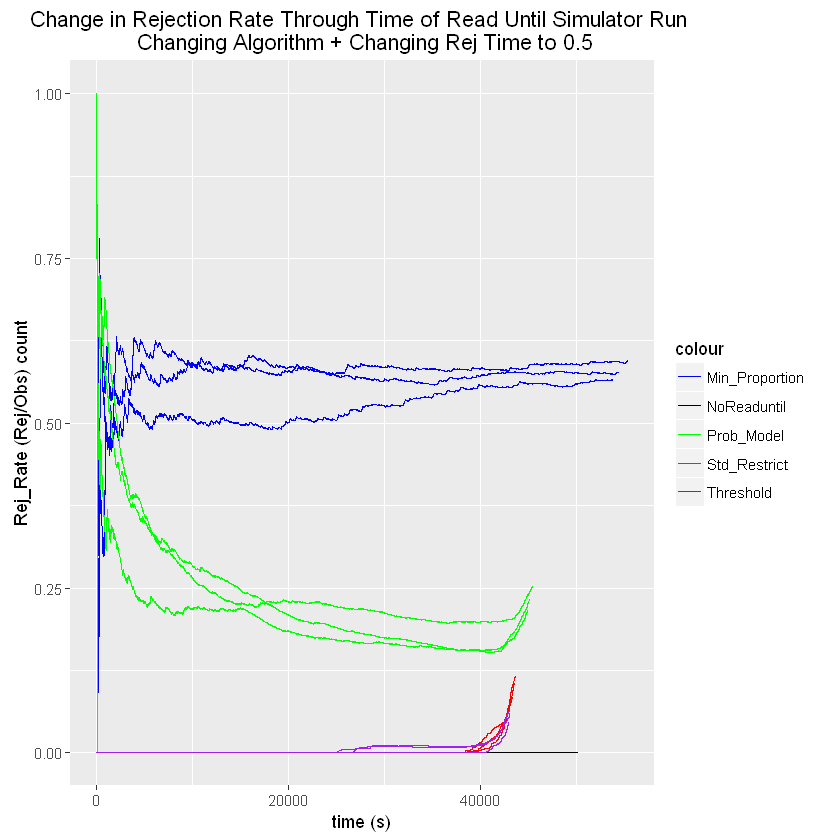

In [12]:
#Rej time
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000 
#-reload/match time 1s
#-rej time 0.5
#-seq speed 250bs/s

name = "Rej_time"

#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig11 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Through Time of Read Until Simulator Run \n Changing Algorithm + Changing Rej Time to 0.5")+
ylab("Rej_Rate (Rej/Obs) count")+xlab("time (s)")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig11

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Rej_time = data.frame(number,names, Averages)
#add label for overall graph
Average_Rej_time["Test"] = "Reject_Time"

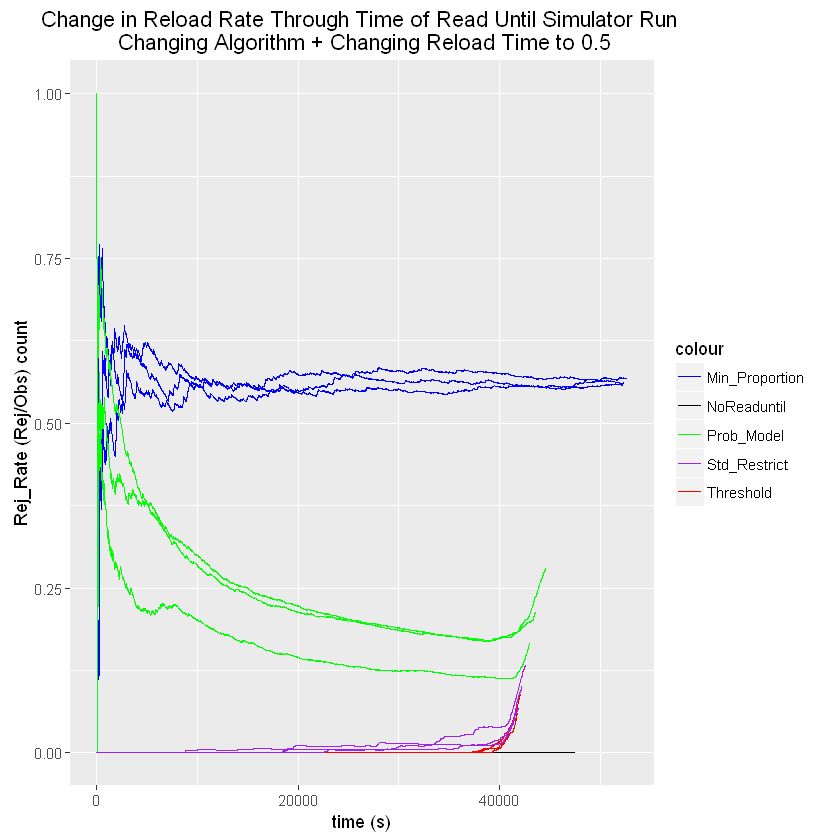

In [14]:
#Reload time
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000 
#-match/Rej time 1s
#-Reload time 0.5
#-seq speed 250bs/
name = "Reload_Time"

#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig12 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Reload Rate Through Time of Read Until Simulator Run \n Changing Algorithm + Changing Reload Time to 0.5")+
ylab("Rej_Rate (Rej/Obs) count")+xlab("time (s)")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig12

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Reload_Time = data.frame(number,names, Averages)
#add label for overall graph
Average_Reload_Time["Test"] = "Reload_Time"

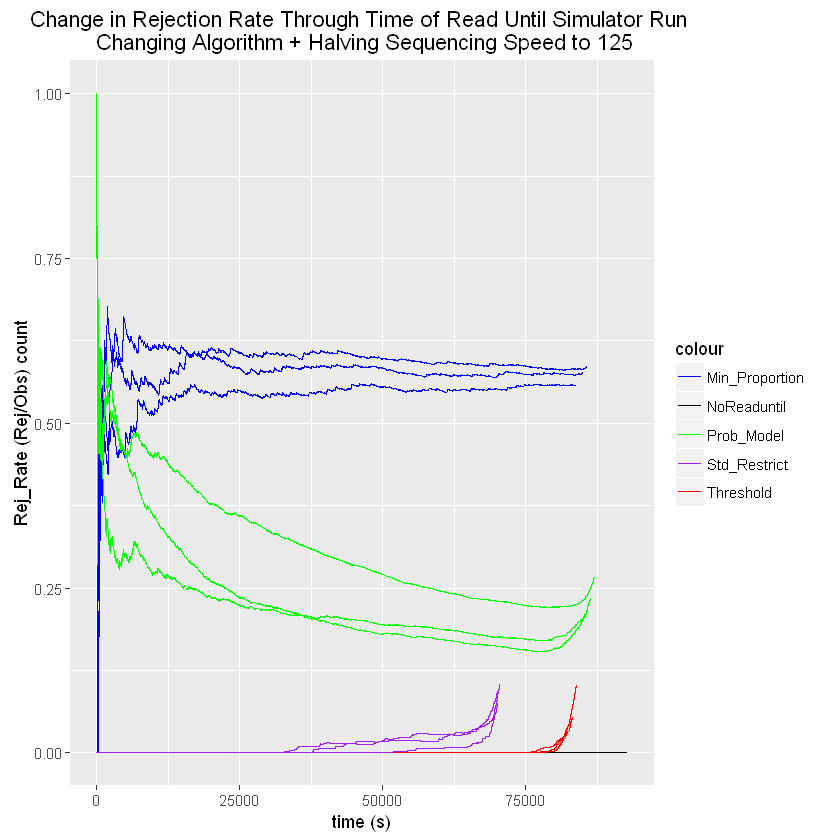

In [10]:
#Seq Speed halved
#paras in simulator 
#-cov 250,250,250,250,250,250,250,250,250,250
#-ratio 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
#-readlength 2000 
#-match/Rej time 1s
#-Reload time 0.5
#-seq speed 125bs/s
#import log files containing rejection rate everytime an even occurs
#No read until runs 
name = "Seq_Time"

rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
#calculate averages 
Average_RejratesNR1 = mean(rates_NR1[["RejRate"]])
Average_RejratesNR2 = mean(rates_NR2[["RejRate"]])
Average_RejratesNR3 = mean(rates_NR3[["RejRate"]])

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesP1 = mean(rates_P1[["RejRate"]])
Average_RejratesP2 = mean(rates_P2[["RejRate"]])
Average_RejratesP3 = mean(rates_P3[["RejRate"]])

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_RejratesT1 = mean(rates_T1[["RejRate"]])
Average_RejratesT2 = mean(rates_T2[["RejRate"]])
Average_RejratesT3 = mean(rates_T3[["RejRate"]])

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejrates1b1 = mean(rates_1b1[["RejRate"]])
Average_Rejrates1b2 = mean(rates_1b2[["RejRate"]])
Average_Rejrates1b3 = mean(rates_1b3[["RejRate"]])

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")
Average_Rejratesstd_res1 = mean(rates_std_res1[["RejRate"]])
Average_Rejratesstd_res2 = mean(rates_std_res2[["RejRate"]])
Average_Rejratesstd_res3 = mean(rates_std_res3[["RejRate"]])

#lineplot
Fig13 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Through Time of Read Until Simulator Run \n Changing Algorithm + Halving Sequencing Speed to 125")+
ylab("Rej_Rate (Rej/Obs) count")+xlab("time (s)")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig13

#calcualte averages used later on for compareing between tests
number = c(1:15)
names = c("NoReadUntil","NoReadUntil","NoReadUntil","Prob_Model","Prob_Model","Prob_Model","Threshold","Threshold","Threshold","Min_proportion","Min_proportion","Min_proportion","Std_Restrict","Std_Restrict","Std_Restrict")
Averages = c(Average_RejratesNR1,Average_RejratesNR2,Average_RejratesNR3,Average_RejratesP1,Average_RejratesP2,Average_RejratesP3, Average_RejratesT1,Average_RejratesT2,Average_RejratesT3,Average_Rejrates1b1,Average_Rejrates1b2,Average_Rejrates1b3,Average_Rejratesstd_res1,Average_Rejratesstd_res2,Average_Rejratesstd_res3)
Average_Seq_Time = data.frame(number,names, Averages)
#add label for overall graph
Average_Seq_Time["Test"] = "Seq_Speed"

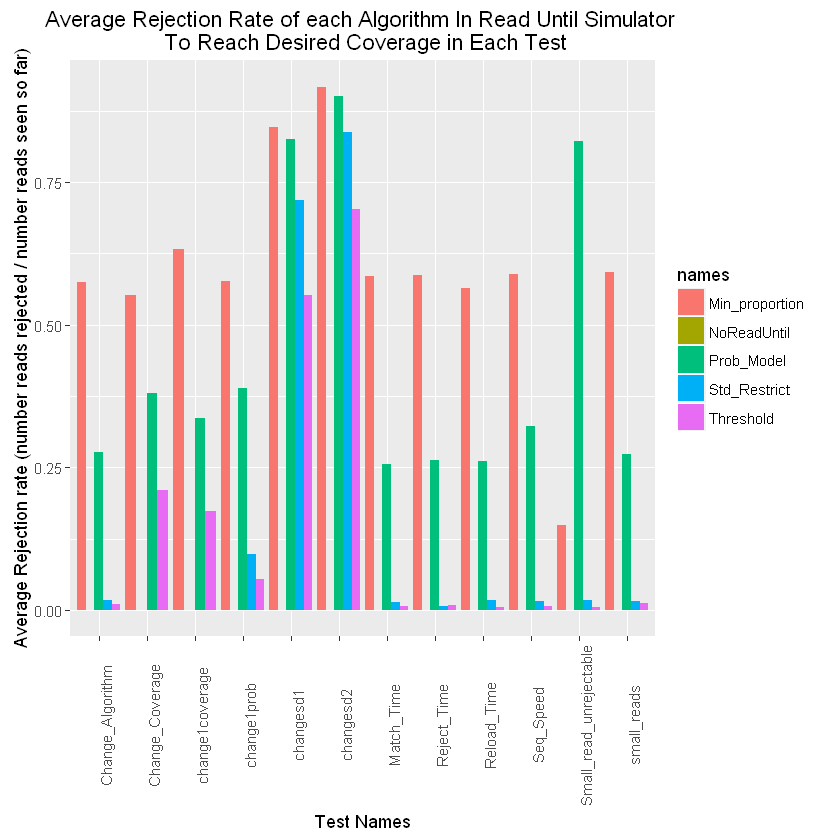

In [32]:

#overall graph overview of avg rates
master_avg_rates = rbind(Average_Seq_Time,
                         Average_Reload_Time,
                         Average_Rej_time,
                         Average_Match_time,
                         Average_Change_Algorithm,
                        Average_change1prob,
                        Average_changesd1,
                        Average_changesd2,
                        Average_change1coverage,
                        Average_Change_Coverage,
                        Average_Small_read_unrejectable,
                        Average_small_reads)
#overall grouped bar plot

ggplot(master_avg_rates,aes(Test,Averages, fill=names)) + 
geom_bar(stat= "identity", position= "dodge") +   
theme(axis.text.x=element_text(angle=90))+
ylab("Average Rejection rate (number reads rejected / number reads seen so far)") + xlab("Test Names") + ggtitle("Average Rejection Rate of each Algorithm In Read Until Simulator \n To Reach Desired Coverage in Each Test")



